## Observations and Insights 

This analytical project was primarily conducted to established whether the potential treatments are effective. From the brief history given by the company the data provided is the potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

During the analysis of the various drug regimens used by the company during research it's significant to note that capomulin drug regimen is more effective when compared to the rest in terms of total tumor volume plotted on boxplot figure. Capomulin data are closely grouped together and shows a linear progression with no outliers. 

Ramicane also, shows a similar effectiveness as compared to capomulin in terms of tumor to volume ratio. The other two drugs on the top of the list has a slightly higher tumor to volume ratio and infubinol had an outlier making it least effective despite its linear progression with outlier that might skew the data hence false representation.

When mouse weight was compared to the total volume used, it is worth mentioning that there is a positive correllation. The heavier the mouse weighs the more tumor volume it needs and vice versa. On overall, the analysis of the results shows a positive trend and consistency making the data in my view reliable for  a potential treatment of skin cancer.



In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merge the two data csv into a single dataset and 
# Display the data table for preview
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [79]:
# Checking the number of uniqque mice within the dataframe and
#Display the number of unique mice IDs in the data
#using unique() and mouse id 

total_mice = pd.unique(combined_mouse_data['Mouse ID'])
len(total_mice)

249

In [80]:
#Clean the data by checking for any mouse ID with duplicate time points
#first start by finding the total number of duplicate id
duplicate_count=len(combined_mouse_data)-len(combined_mouse_data.drop_duplicates())
duplicate_count



1

In [81]:
# with the total number of duplicate identified display dupliocated mouse ID number with Timepoints. 
#use the merged dataframe and both .loc and iloc to display the duplicate mouse id and its different timepoints.
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})

duplicate_mice=combined_mouse_data.loc[combined_mouse_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data.loc[combined_mouse_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame to confirm that all the duplicates are removed
#From our combined merged data there were 249 unique with 1 duplicates thus the end results after cleaning is 248.
mice_total_clean = pd.unique(clean_df['Mouse ID'])
len(mice_total_clean)

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, var, std and SEM of the tumor volume for each regimen
# cleaned DataFrame is used from this point going forward.
# Use groupby and summary statistical methods to calculate properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = clean_df.groupby('Drug Regimen')

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_regimen_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })

summary_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
#The second summary dataframe is using single line aggregate with similar results as previous summary df

summary_agg_data=summary_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],})
summary_agg_data.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [86]:
#Generate two bar plots that are identical and show the total number of timepoints.
#inorder to Create bar plots df with filtered data for drug regimen used and its data points is needed.
#create a filtered drug regimen df

drug_regimen_data = clean_df['Drug Regimen'].value_counts()
#drug_regimen_data

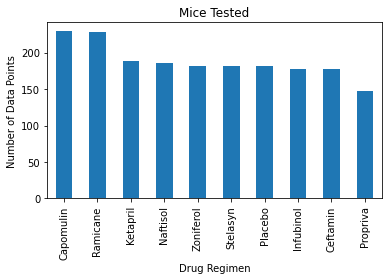

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#label both the x and y axis with Drug regimen for the x_axis and number of data points for the y_axis

drug_regimen_data.plot(kind="bar",figsize=(5.5,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.tight_layout()

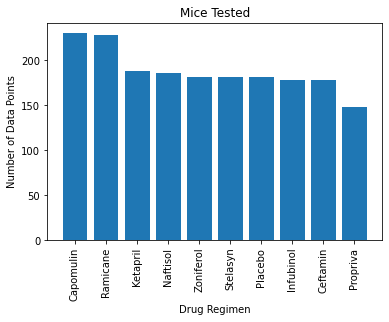

<Figure size 432x288 with 0 Axes>

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#label both the x and y axis with Drug regiment for the x_axis and number of data points for the y_axis

plt.bar(drug_regimen_data.index.values, drug_regimen_data.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

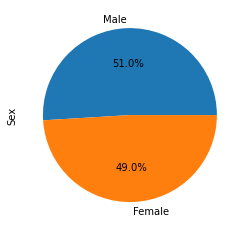

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Create the first pie plot by using both Pandas's `DataFrame.plot()`
sex_count = clean_df['Sex'].value_counts()
sex_count.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

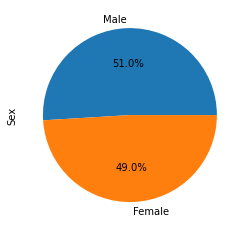

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create the second pie plot by using Matplotlib's `pyplot` methods.
plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#using the clean dateframe group timepoint per id to identify its individual max.

timepoint_max_df = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())
#timepoint_max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge data with greatest timepoint with original cleaned data.
#new column for time point is created after the merge...timepoint_y

merged_max_df= pd.merge(clean_df, timepoint_max_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


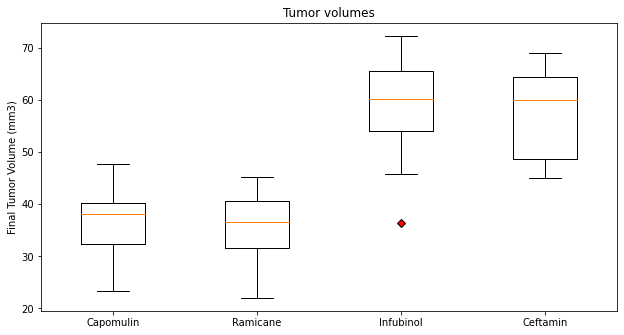

In [92]:
###Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens
#Create a list that holds the treatment names
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#using .iloc group the data by the drug regimen for the four drugs.
#identify the max tumor volume for each and use it to plot
capomulin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ceftamin",:]
caft = ceftamin['Tumor Volume (mm3)']
#put the grouped drug regimen data in a single data format for plotting
data = [capo, rami, infu, caft]
 
fig = plt.figure(figsize =(8, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data, labels=treatment_list,flierprops=red_diamond) 
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
 
# show plot
plt.show()



In [93]:
# Determine outliers using upper and lower bounds
## Using the max tumor volume calculate the outline for Capomulin drug regimen
quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capo is: {lowerq}")
print(f"The upper quartile of capo is: {upperq}")
print(f"The interquartile range of capo is: {iqr}")
print(f"The the median of capo is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_df = capomulin.loc[(capomulin['Tumor Volume (mm3)']<lower_bound)|(capomulin['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(num_outlier)  

The lower quartile of capo is: 32.37735684
The upper quartile of capo is: 40.1592203
The interquartile range of capo is: 7.781863460000004
The the median of capo is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0


In [94]:
#### Using the max tumor volume calculate the outline for Ramicane drug regimen 
quartiles = rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of rami is: {lowerq}")
print(f"The upper quartile of rami is: {upperq}")
print(f"The interquartile range of rami is: {iqr}")
print(f"The the median of rami is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_df = ramicane.loc[(ramicane['Tumor Volume (mm3)']<lower_bound)|(ramicane['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(num_outlier) 
 

The lower quartile of rami is: 31.56046955
The upper quartile of rami is: 40.65900627
The interquartile range of rami is: 9.098536719999998
The the median of rami is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
0


In [95]:
#### Using the max tumor volume calculate the outline for Infubinol drug regimen 

quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infu is: {lowerq}")
print(f"The upper quartile of infu is: {upperq}")
print(f"The interquartile range of infu is: {iqr}")
print(f"The the median of infu is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


outlier_df = infubinol.loc[(infubinol['Tumor Volume (mm3)']<lower_bound)|(infubinol['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(num_outlier) 

The lower quartile of infu is: 54.04860769
The upper quartile of infu is: 65.52574285
The interquartile range of infu is: 11.477135160000003
The the median of infu is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
1


In [96]:
#### Using the max tumor volume calculate the outline for Ceftamin drug regimen 
#### For Ceftamin drug regimen the max tumor volume is grouped in (caft )
quartiles = caft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = caft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of caft is: {lowerq}")
print(f"The upper quartile of caft is: {upperq}")
print(f"The interquartile range of caft is: {iqr}")
print(f"The the median of rami is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_df = ceftamin.loc[(ceftamin['Tumor Volume (mm3)']<lower_bound)|(ceftamin['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(num_outlier) 


The lower quartile of caft is: 48.72207785
The upper quartile of caft is: 64.29983003
The interquartile range of caft is: 15.577752179999997
The the median of rami is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
0


## Line and Scatter Plots

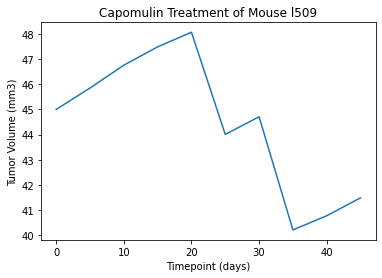

In [97]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#select mouse id that is treated with capomulin and used it to plot
#timepoints as the x-axis and tumor volume as the y-axis

mouse_capomulin = clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin drug regimen
# using .loc() create drug regimine data for only Capomulin.

data_capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

average_renamed_df = data_capomulin_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

#with data_capomulin_df created, group the data by Average_tumor_volume 
# Rename the Tumor volume column to average tumor volume
Average_tumor_volume =average_renamed_df.groupby(['Mouse ID']).mean()

Average_tumor_volume.head()


,Timepoint,Average Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


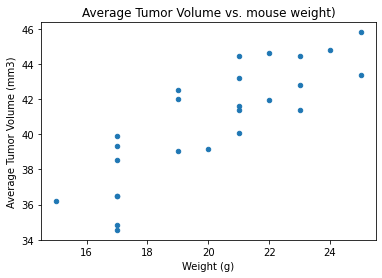

In [99]:
# Create a scatter plot which compares average tumor volume vs. mouse weight for the Capomulin regimen

#Using the dataframe average_tumor-volume create a scatter plot for weight and average tumor volume

Average_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4),
                           
              title="Average Tumor Volume vs. mouse weight)"  )
plt.show()



## Correlation and Regression

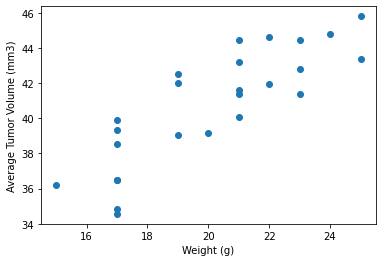

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723


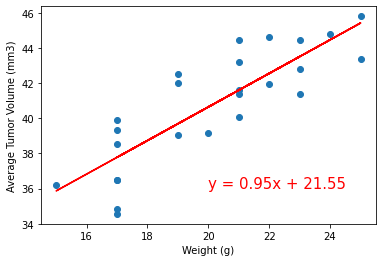

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# using Pearson correlation coefficient calculate coeff. between "average tumor volume and mouse weight"
#using the decicated capomulin df(average_tumor_volume)
average_tumor_volume = Average_tumor_volume.iloc[:,1]
mouse_weight = Average_tumor_volume.iloc[:,4]

correlation = st.pearsonr(mouse_weight,average_tumor_volume)

# Compare the calcualted Pearson's r to the plots
x_values = Average_tumor_volume['Weight (g)']
y_values = Average_tumor_volume['Average Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

x_values = Average_tumor_volume['Weight (g)']
y_values = Average_tumor_volume['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.show()